In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.dpi']= 100
matplotlib.rcParams['figure.figsize'] = 15, 5
from math import pi
from scipy.fft import fft, fftfreq, fftshift, rfft, rfftfreq


In [2]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

def plot_spectrum_stem(sig, sample_rate, lower=0, upper=None):
    yf = rfft(sig)
    xf = rfftfreq(len(sig), 1 / sample_rate)
    if upper is None:
        upper = len(xf)

    plt.stem(xf[lower:upper], np.abs(yf)[lower:upper])
    plt.xlabel('Freq, Hz')
    plt.ylabel('Values')
    plt.show()

def plot_sig_rfft(sig, sample_rate):
    yf = rfft(sig)
    xf = rfftfreq(len(sig), 1 / sample_rate)
    plt.plot(xf, np.abs(yf))
    plt.xlabel('Freq, Hz')
    plt.ylabel('Values')
    plt.show()

    # normalize the magnitude
    transformed_sig = abs(fft(sig) / len(sig))
    # plt.plot(timestamps, transformed_sig, color="red")
    # plt.show()
    return transformed_sig

# fft() calculates the transform itself.
# fftfreq() calculates the frequencies in the center of each bin in the output of fft().
#  Without this, there would be no way to plot the x-axis on your frequency spectrum.


In [3]:
x_n = [5, -6, 7, 8]
yf = fft(x_n)
yf

array([14. -0.j, -2.+14.j, 10. -0.j, -2.-14.j])

In [4]:
np.abs(yf)

array([14.        , 14.14213562, 10.        , 14.14213562])

# task 1

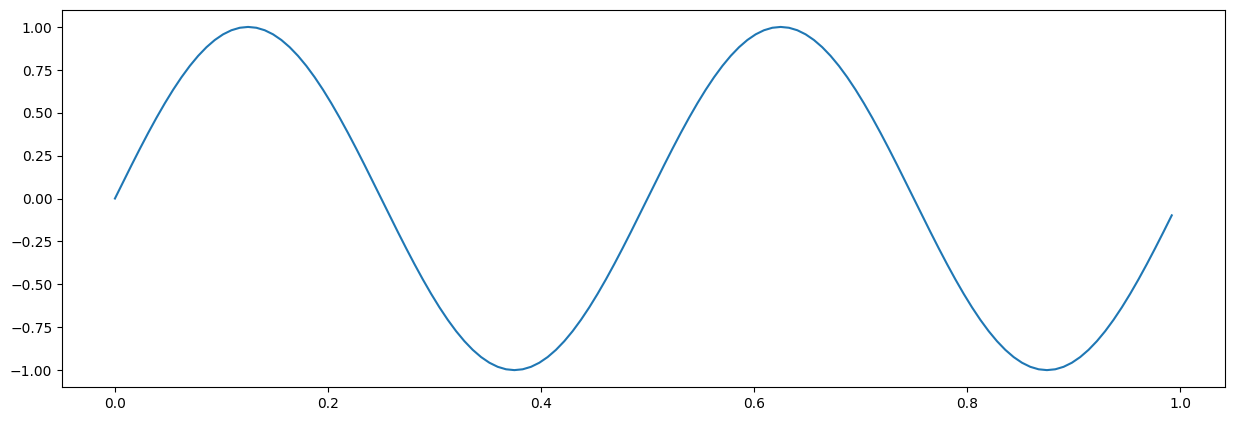

In [5]:
timestamps = np.linspace(0, 1, 128)
# omega = 2 * pi * freq
timestamps, sig_2hz = generate_sine_wave(2, 128, 1)
sig_2_5hz = np.sin(2.5 * 2 * pi * timestamps)
sig_40hz = np.sin(40 * 2 * pi * timestamps)
sig_100hz = np.sin(100 * 2 * pi * timestamps)
sig_600hz = np.sin(600 * 2 * pi * timestamps)
plt.plot(timestamps, sig_2hz)
plt.show()


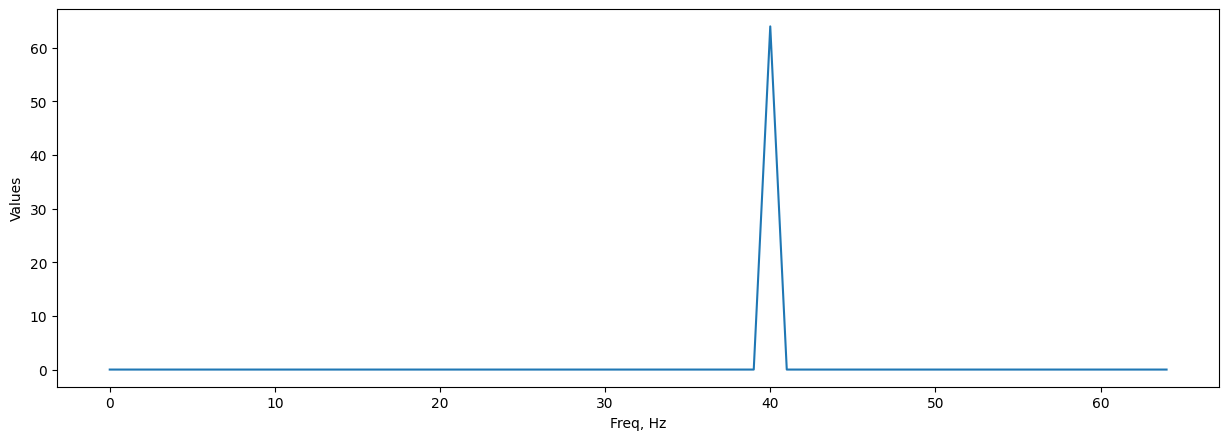

In [6]:
plot_sig_rfft(sig_40hz, 128);
# ампілітудний смектр, frequency spectrum 

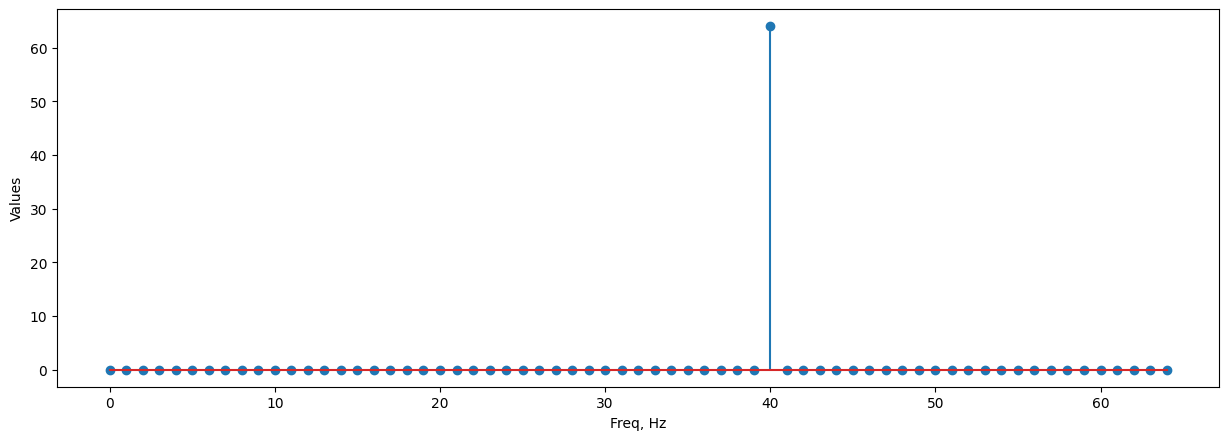

In [7]:
plot_spectrum_stem(sig_40hz, 128)

#### Task 2

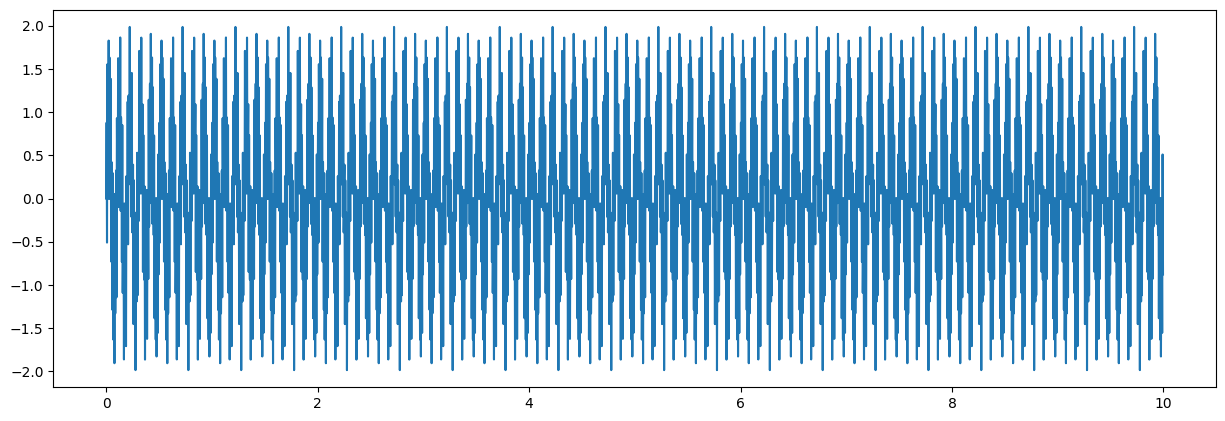

In [8]:

sample_rate = 256

timestamps, sig_10hz = generate_sine_wave(10, sample_rate, 10)
timestamps, sig_100hz = generate_sine_wave(100, sample_rate, 10)

sig_sum = sig_10hz + sig_100hz
sig_combine1 = np.concatenate((2 * sig_10hz, 2 * sig_100hz))
sig_combine2 = np.concatenate((2 * sig_100hz, 2 * sig_10hz))

plt.plot(timestamps, sig_sum)
plt.show()


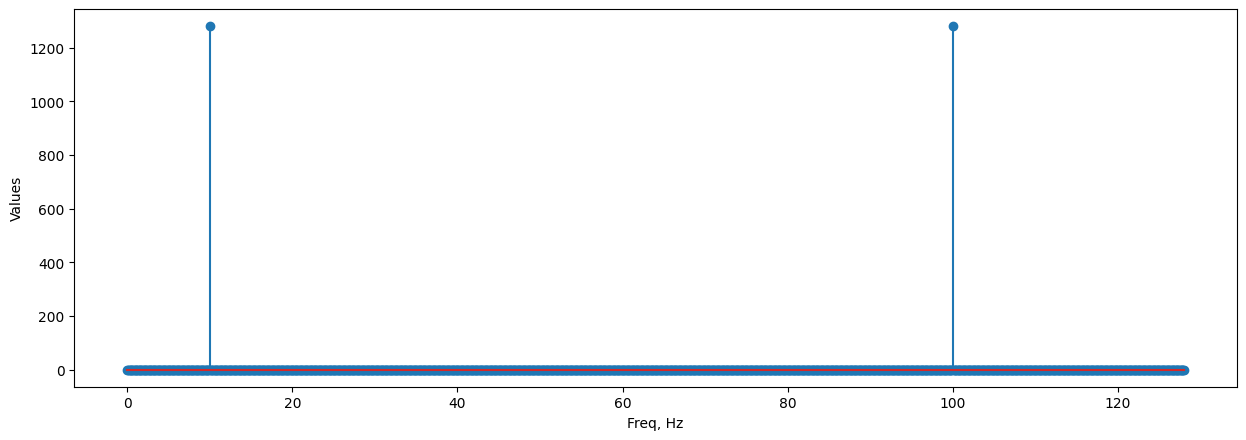

In [9]:
plot_spectrum_stem(sig_sum, sample_rate)

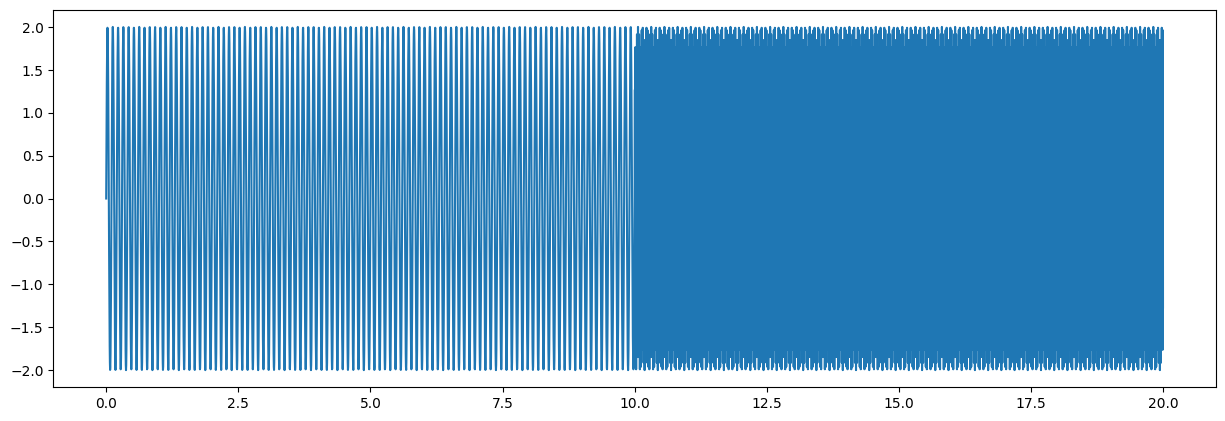

In [10]:
plt.plot(np.concatenate((timestamps, timestamps+10)), sig_combine1)
plt.show()

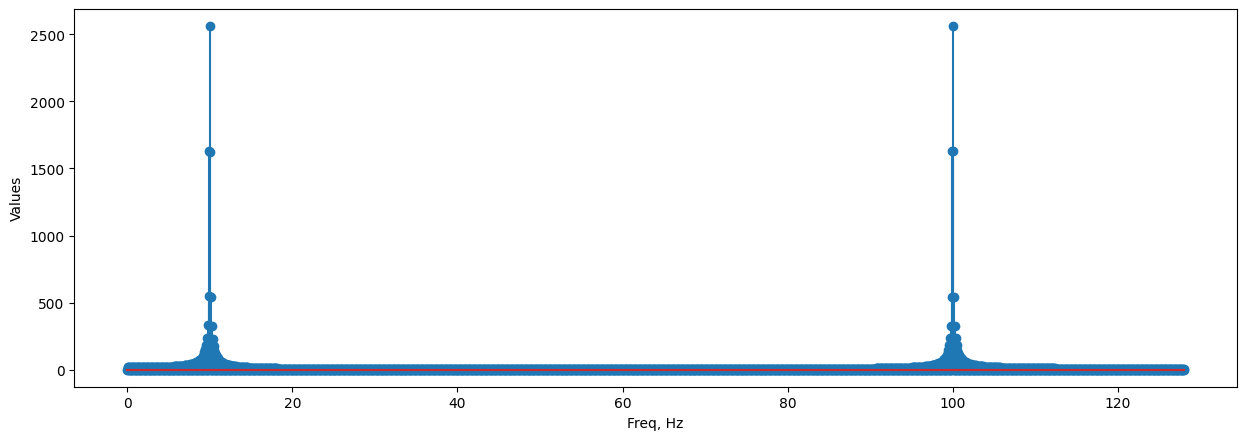

In [11]:
plot_spectrum_stem(sig_combine1, sample_rate)

### task 3

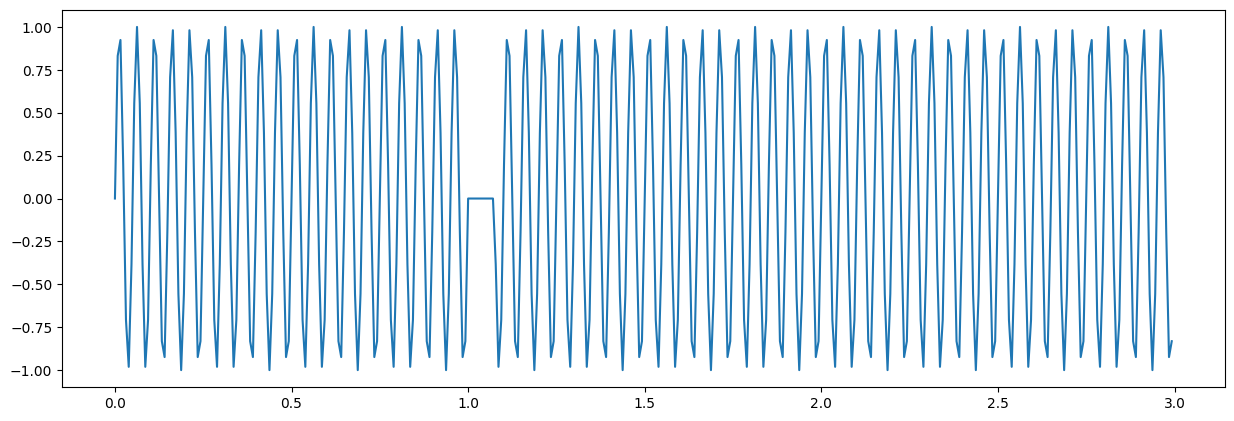

In [12]:
sample_rate = 128

timestamps, sig_20hz = generate_sine_wave(20, sample_rate, 3)
sig_20hz[sample_rate:sample_rate+10] = 0

plt.plot(timestamps, sig_20hz)

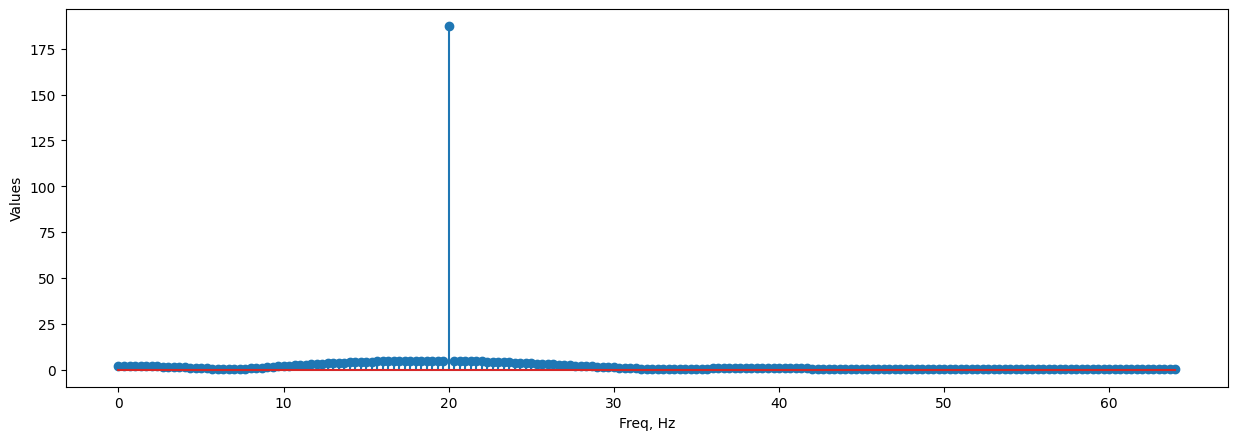

In [13]:
plot_spectrum_stem(sig_20hz, sample_rate)

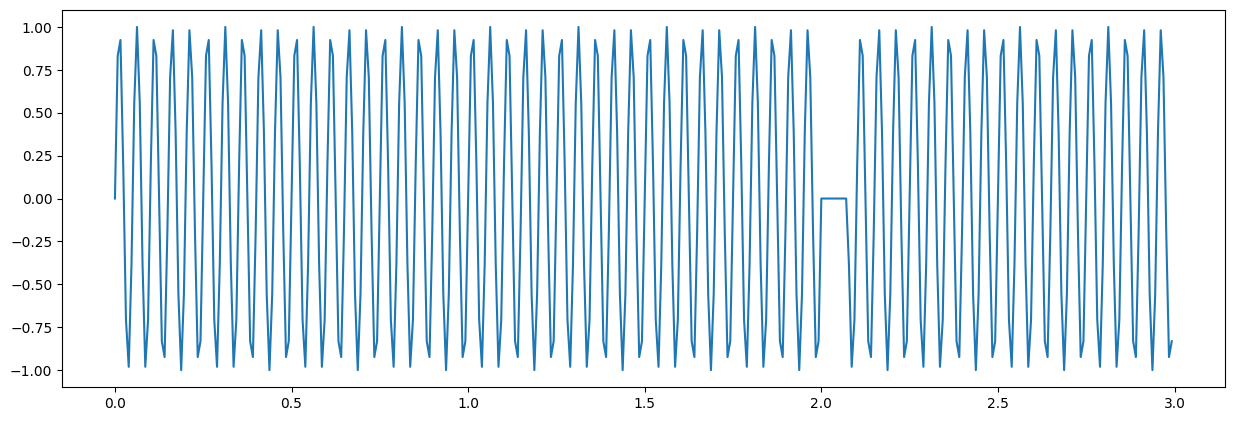

In [14]:
sample_rate = 128

timestamps, sig_20hz = generate_sine_wave(20, sample_rate, 3)
sig_20hz[2 *sample_rate: 2 *sample_rate+10] = 0

plt.plot(timestamps, sig_20hz)

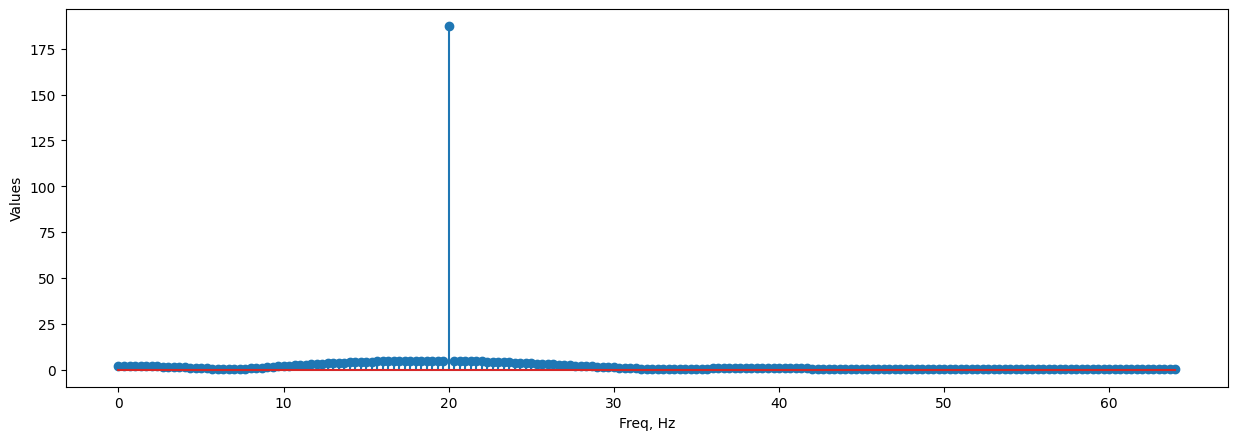

In [15]:
plot_spectrum_stem(sig_20hz, sample_rate)

Висновок: не можливо визначити точне розташування розриву в сигналі, аналізуючи спектр сигналу.

#### Task 4

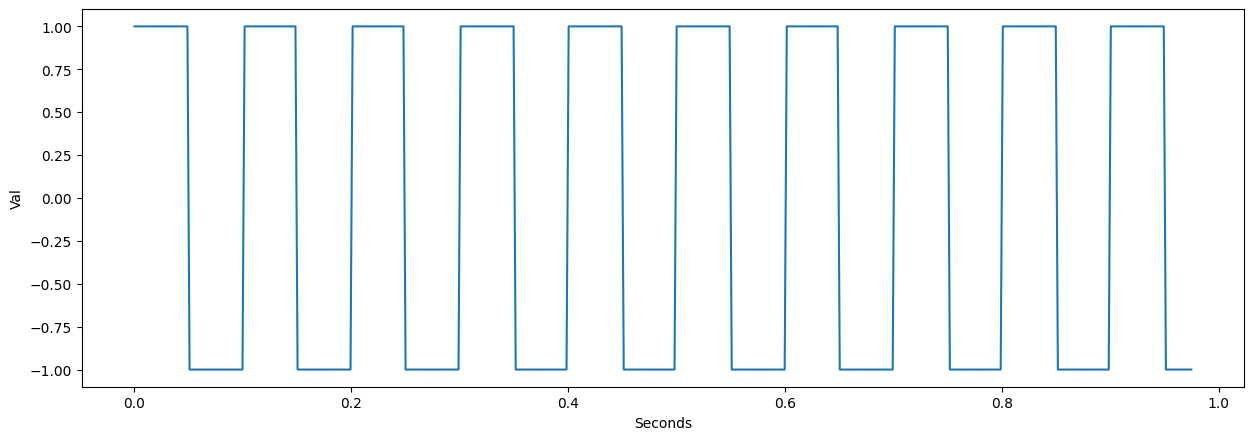

In [16]:
from scipy.signal import square

sample_rate = 512
timestamps, sig = generate_sine_wave(1, sample_rate, 3)

imp_dur = 10
s_10hz = square(10 * 2 * np.pi * timestamps)
s_100hz = square(100 * 2 * np.pi * timestamps)
plt.xlabel("Seconds")
plt.ylabel("Val")
plt.plot(timestamps[:500], s_10hz[:500])


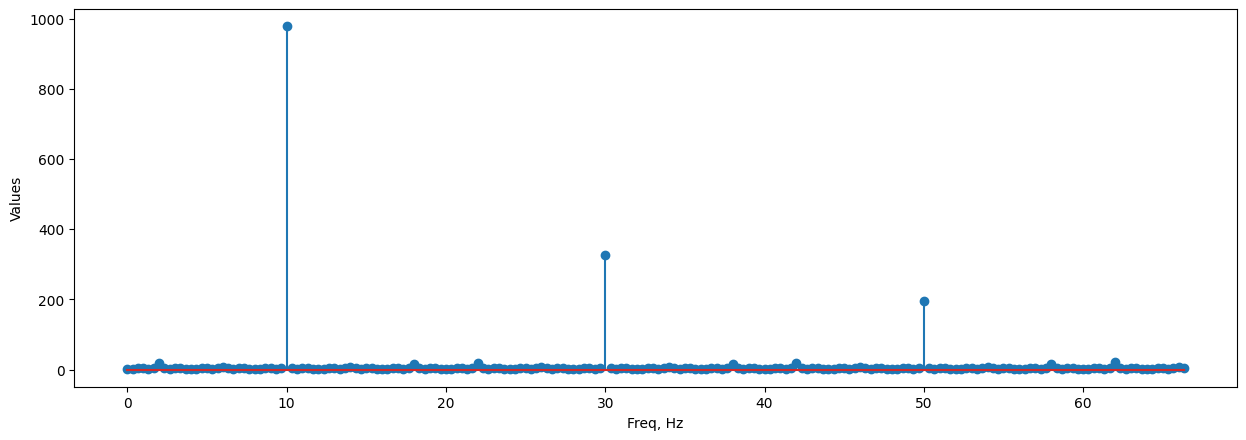

In [17]:
yf = rfft(s_10hz)
xf = rfftfreq(len(s_10hz), 1 / sample_rate)
plt.stem(xf[:200], np.abs(yf)[:200])
plt.xlabel('Freq, Hz')
plt.ylabel('Values')
plt.show()


### Task 5

(512,) (512,)


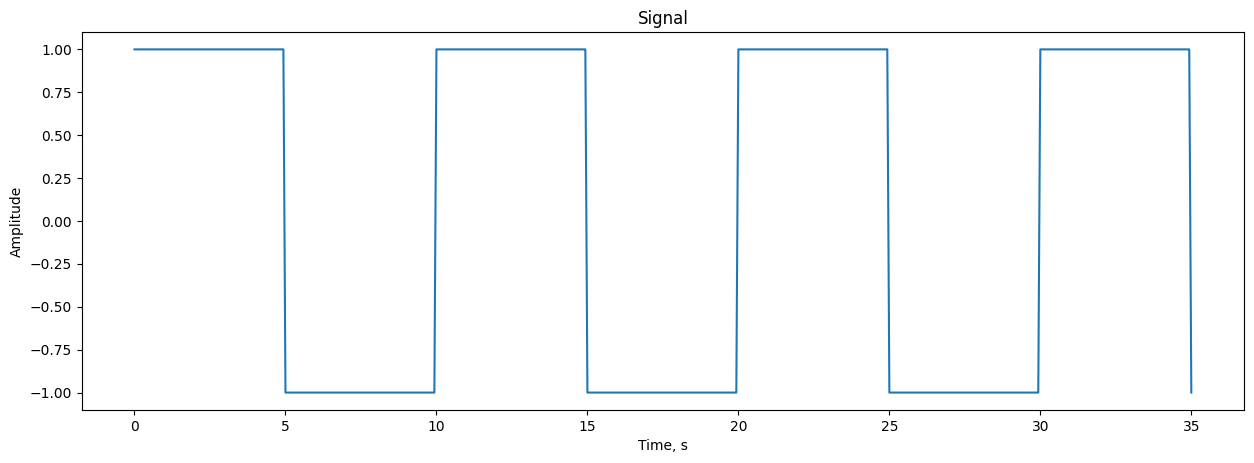

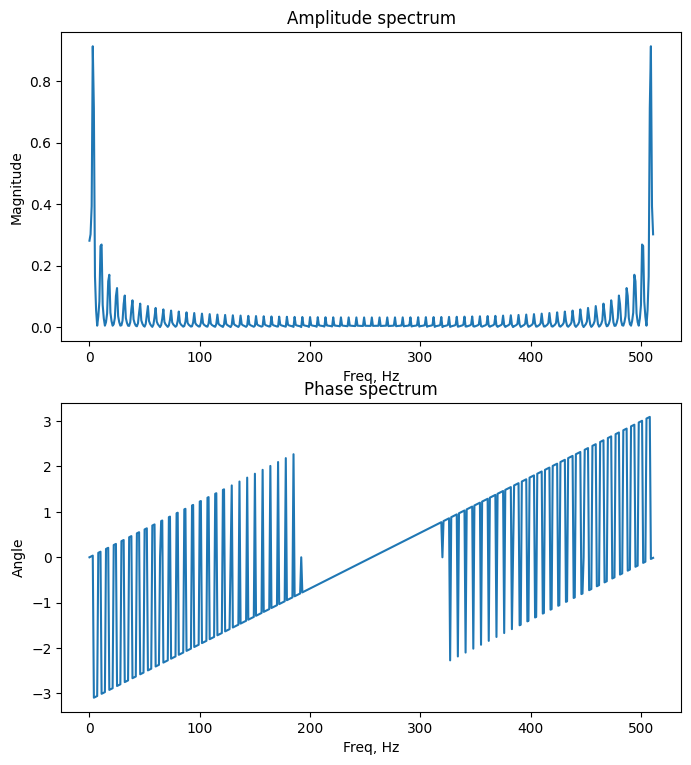

In [18]:
# change time_delay (0 and 5)
time_delay = 5

fs = 512
time_sec = 30
time = np.linspace(0, time_sec + time_delay, fs)
fr = np.arange(0, fs)

# change imp_dur (0.1, 1 and 10)
imp_dur = 10
s = square(2 * np.pi * time / imp_dur)
ss = 2 * fft(s) / len(time)
ampl = abs(ss)
phase = np.angle(ss)

print(ampl.shape, phase.shape)

plt.plot(time, s)
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.title("Signal")
plt.show()

fig, axs = plt.subplots(2, figsize=(8, 9))

axs[0].plot(fr, ampl)
axs[0].set_xlabel("Freq, Hz")
axs[0].set_ylabel("Magnitude")
axs[0].set_title("Amplitude spectrum")
axs[1].plot(fr, phase)
axs[1].set_xlabel("Freq, Hz")
axs[1].set_ylabel("Angle")
axs[1].set_title("Phase spectrum")
plt.show()

# що таке фазовий спектр?


In [19]:
# The phase spectrum specifies the phase of signal components as a 
# function of. component frequency. This phase is measured with respect to a cosine reference.

### task 6

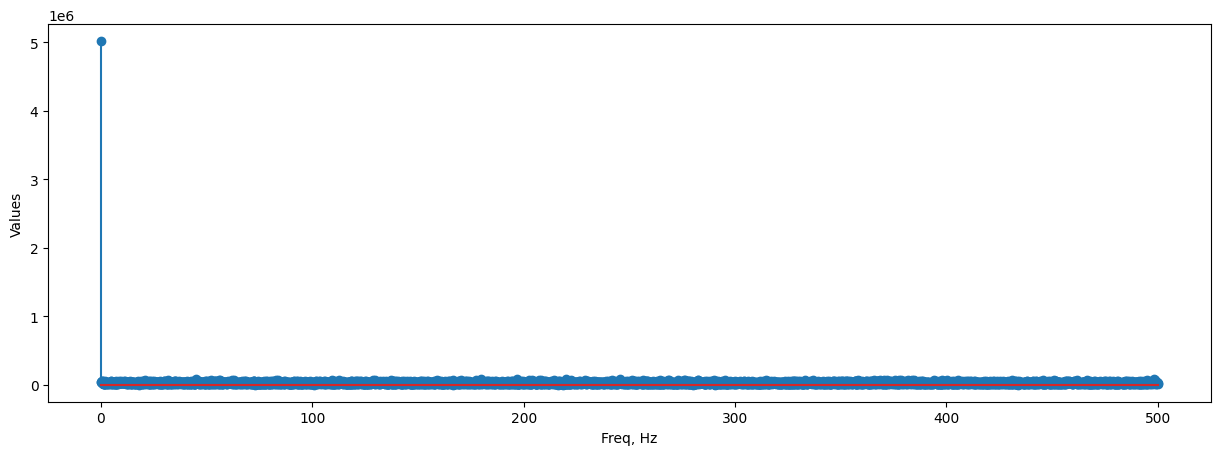

In [20]:
import random
sample_rate = 1000
duration = 10

ts, sig = generate_sine_wave(1, sample_rate, duration)

sig_random = np.array([random.randint(0, 1000) for _ in range(len(sig))])

plot_spectrum_stem(sig_random, sample_rate)



### task 7 ??

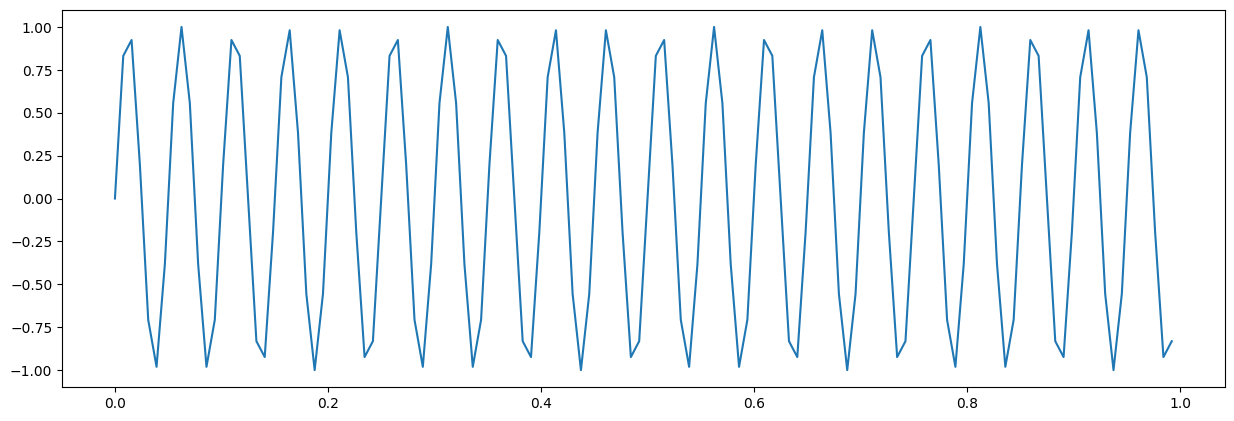

In [21]:
# sample_rate = 128
# time = 0.5
# period = 1 / sample_rate
# freq = 20
# n = int(sample_rate * time)
# time_sequence = np.linspace(0, time - period, n)
# omega = 2 * np.pi * freq
# sig =  np.sin(omega * time_sequence)


timestamps, sig = generate_sine_wave(20, 128, 1)
plt.plot(timestamps, sig)


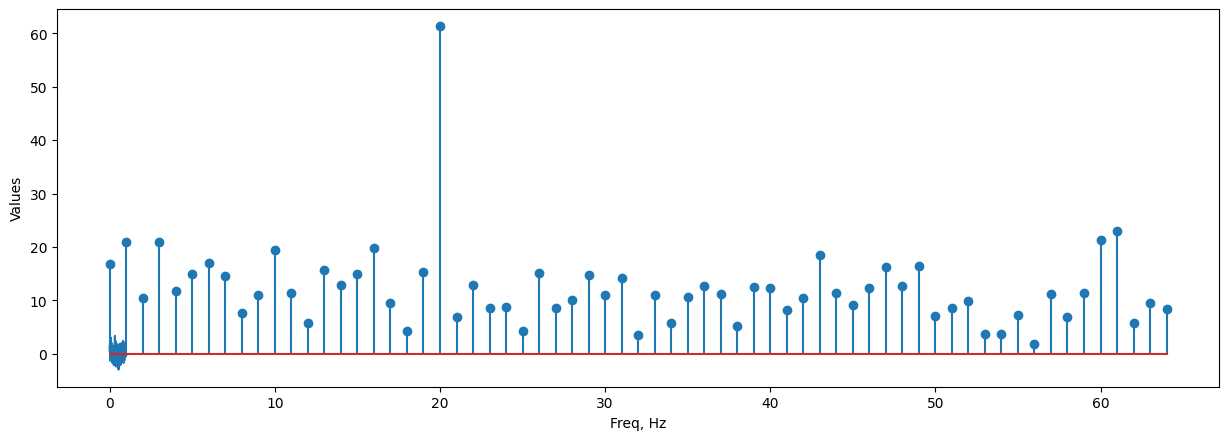

In [22]:
# def change_sample_rate(s_rate, sin_sig):
#     n_noisy = int(s_rate * 0.5)
#     signal = np.random.normal(10, 1, n_noisy)
#     for i in range(0, len(signal), 10):
#         signal[i] += sin_sig[i//10]
#     return signal

# noised_signal = change_sample_rate(128, sig)

# plot_spectrum_stem(noised_signal, 128)

sig_noise = sig + np.random.normal(0.2, 1, len(sig))
plt.plot(timestamps, sig_noise)

plot_spectrum_stem(sig_noise, 128, 0, 100)

In [23]:
# Бачимо як зашумлюється спектр, і основна частота в 20 Герц стає все менш помітною

### task 8

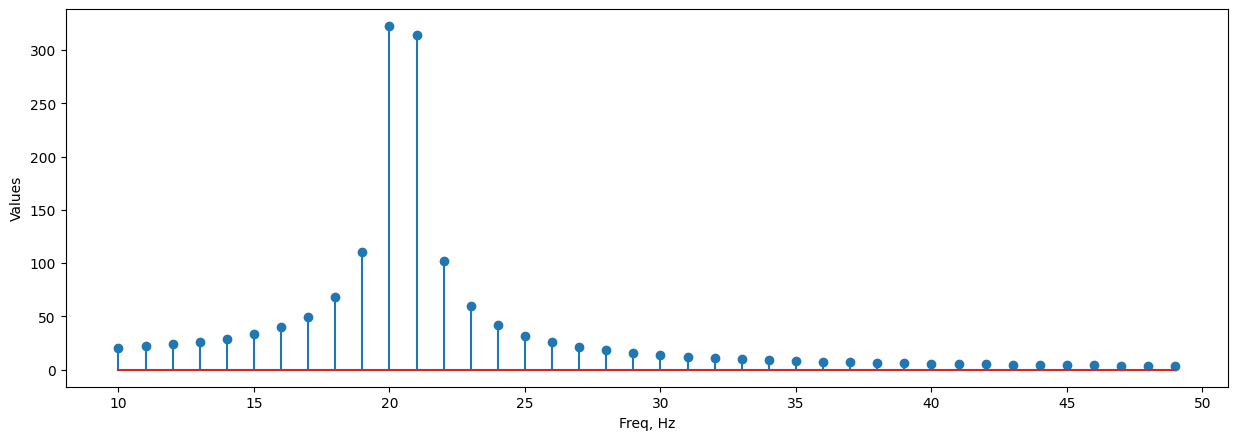

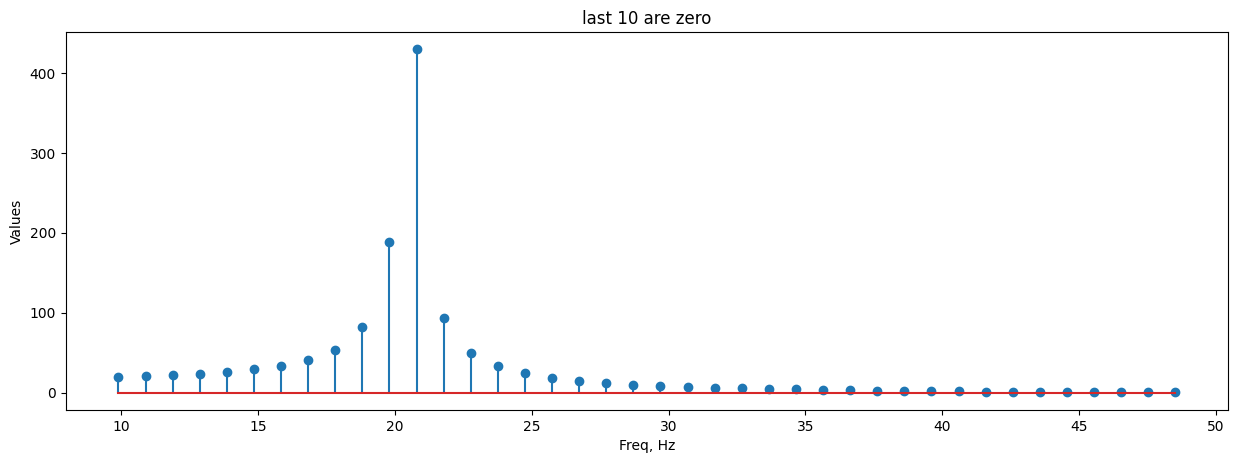

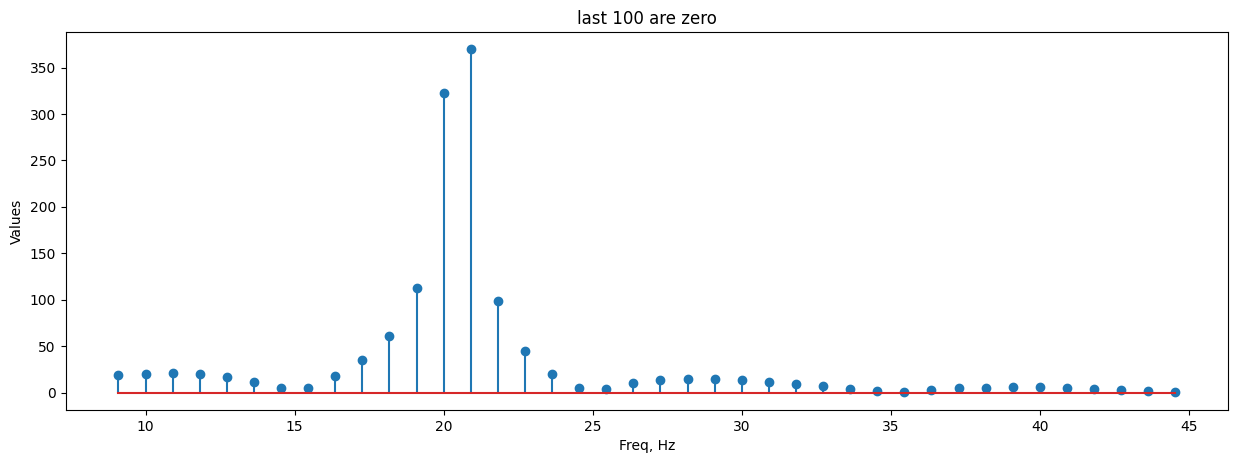

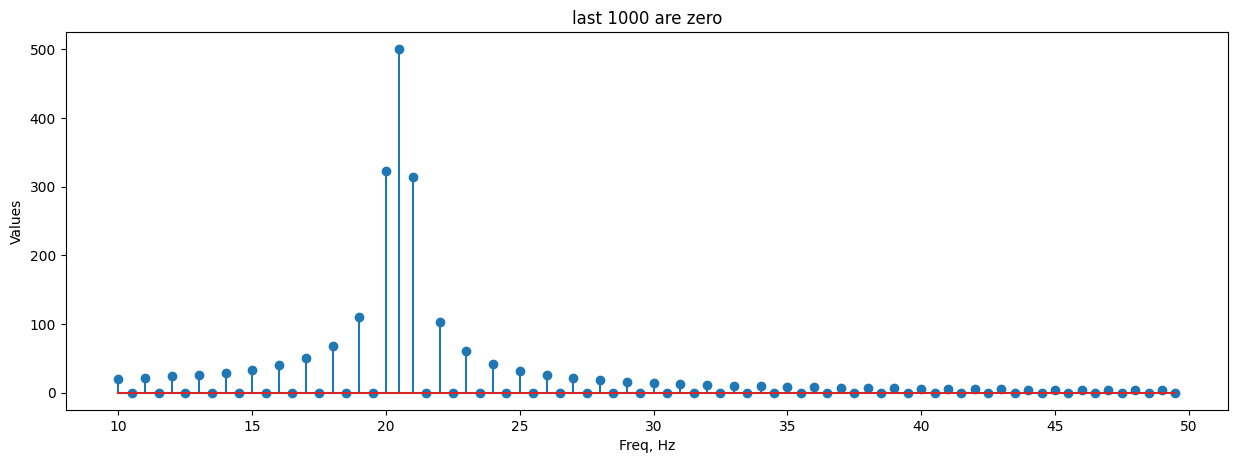

In [24]:
sample_rate = 1000
ts, sig = generate_sine_wave(20.5, sample_rate, 1)

plot_spectrum_stem(sig, sample_rate, lower=10, upper=50)
sig = np.concatenate((sig, np.zeros(10)))
plt.title("last 10 are zero")
plot_spectrum_stem(sig, sample_rate, lower=10, upper=50)
sig = np.concatenate((sig, np.zeros(90)))
plt.title("last 100 are zero")
plot_spectrum_stem(sig, sample_rate, lower=10, upper=50)


sig = np.concatenate((sig, np.zeros(900)))
plt.title("last 1000 are zero")
plot_spectrum_stem(sig, sample_rate, lower=20, upper=100)

In [25]:
# роздільна здатність збільшується, в той час як якість визначення страждає

### task 9

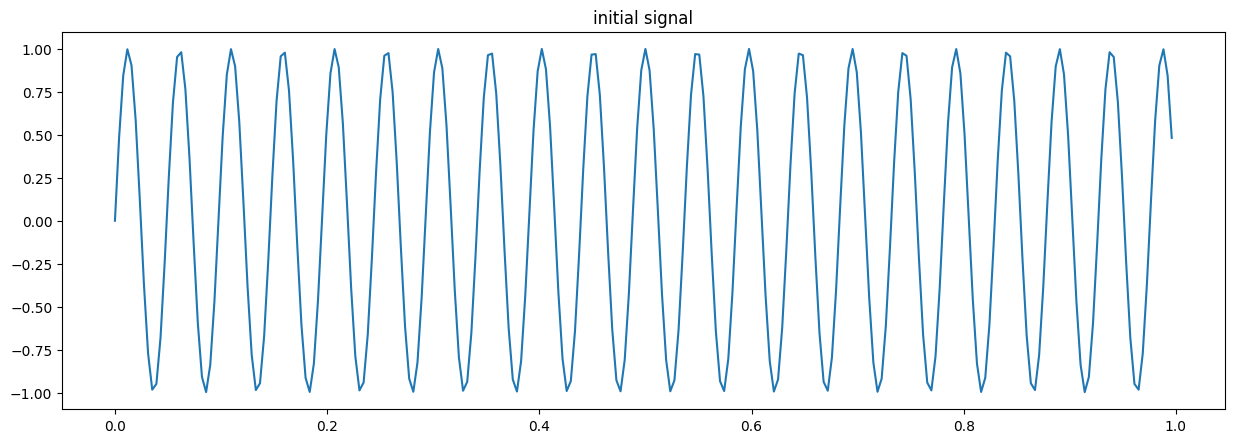

0.706943427785867

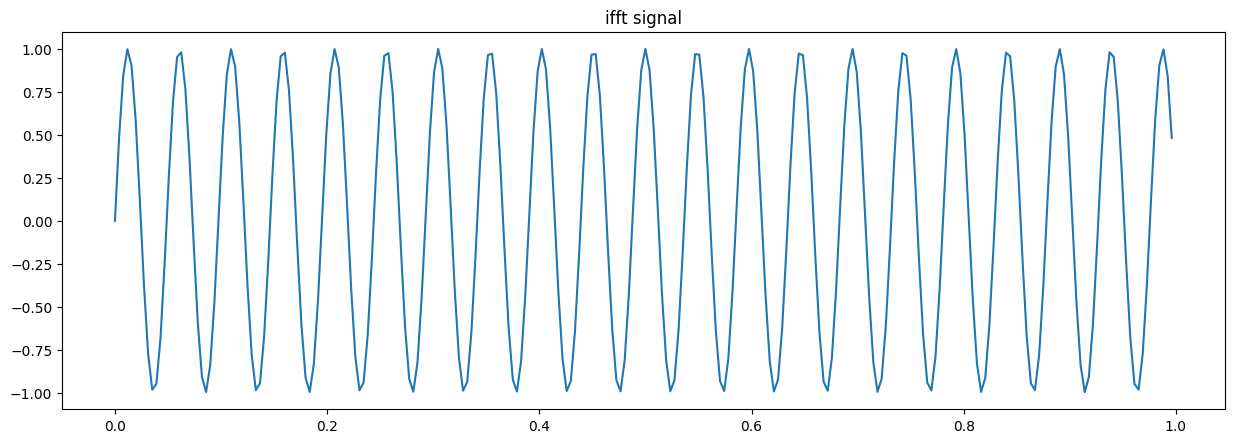

In [26]:
sample_rate = 256
ts, sig = generate_sine_wave(20.5, sample_rate, 1)

transformed_sig = np.fft.rfft(sig)
reversed_signal = np.fft.irfft(transformed_sig)
plt.plot(ts, sig)
plt.title("initial signal")
plt.show()
plt.title("ifft signal")

plt.plot(ts, reversed_signal);
np.std((sig, reversed_signal))

втрачаємо, але втрачаємо небагато

### Task 10

In [27]:
def get_spectral_density(filename, time_step):
    f = open(filename)
    data = f.readlines()
    # imaginary to real, and take 2 power
    ps = np.abs(np.fft.fft(data))**2

    freqs = np.fft.fftfreq(len(data), time_step)
    idx = np.argsort(freqs)

    plt.plot(freqs[idx], ps[idx])
    return freqs

### task 11

In [28]:
def calculate_spectra(signal):
    signal_fft = np.fft.rfft(signal)

    # power of the signal
    signal_psd = np.abs(signal_fft) ** 2
    signal_psd /= len(signal_fft)**2  # normalise

    
    signal_phase = np.angle(signal_fft)
    # new_signal_fft = signal_fft * cmath.rect(1., np.pi/2)

    ## Reverse Fourier transform
    # new_signal = np.fft.irfft(new_signal_fft)

    fft_freq = np.fft.rfftfreq(len(signal))

    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(fft_freq, signal_psd)
    ax2.set_ylabel('Power')
    ax2.set_xlabel('frequency')

    ax2b = ax2.twinx()
    ax2b.plot(fft_freq, signal_phase, alpha=0.25, color='r')
    ax2b.set_ylabel('Phase', color='r')

    plt.tight_layout()

    plt.show()

# _, signal = generate_sine_wave(1, 256, 1)
# calculate_spectra(signal)

In electronic signaling, phase is a definition of the position of a point in time (instant) on a waveform cycle. A complete cycle is defined as 360 degrees of phase as shown in Illustration A below. Phase can also be an expression of relative displacement between or among waves having the same frequency .

### Task 2.1

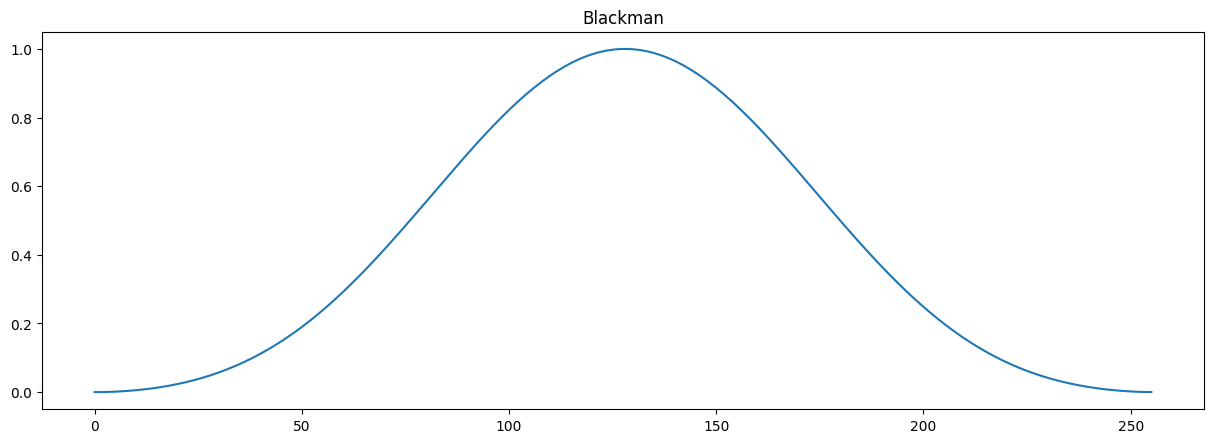

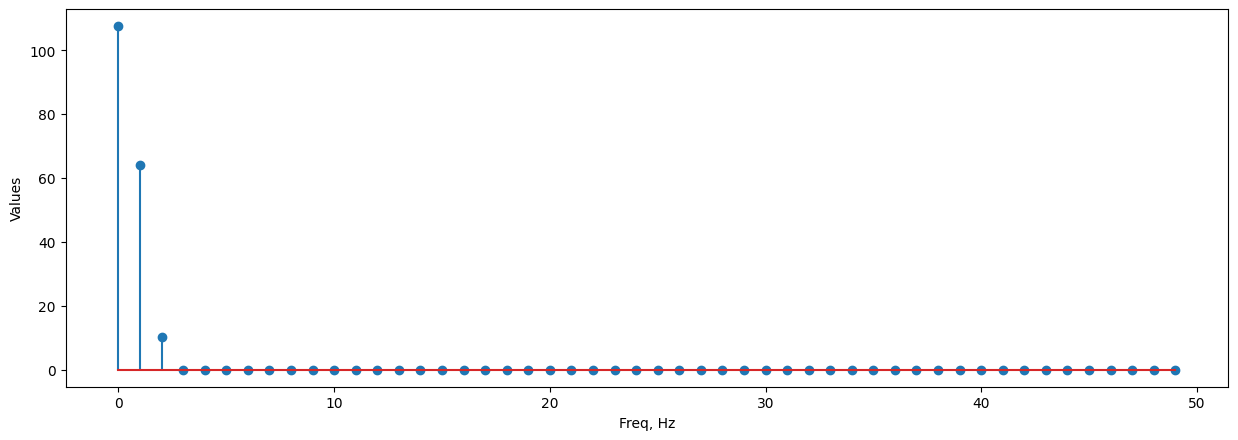

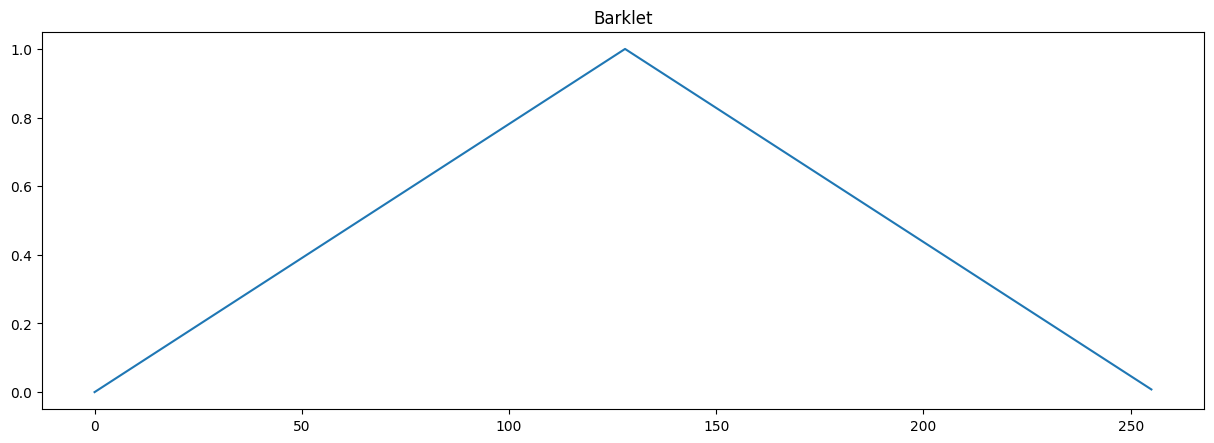

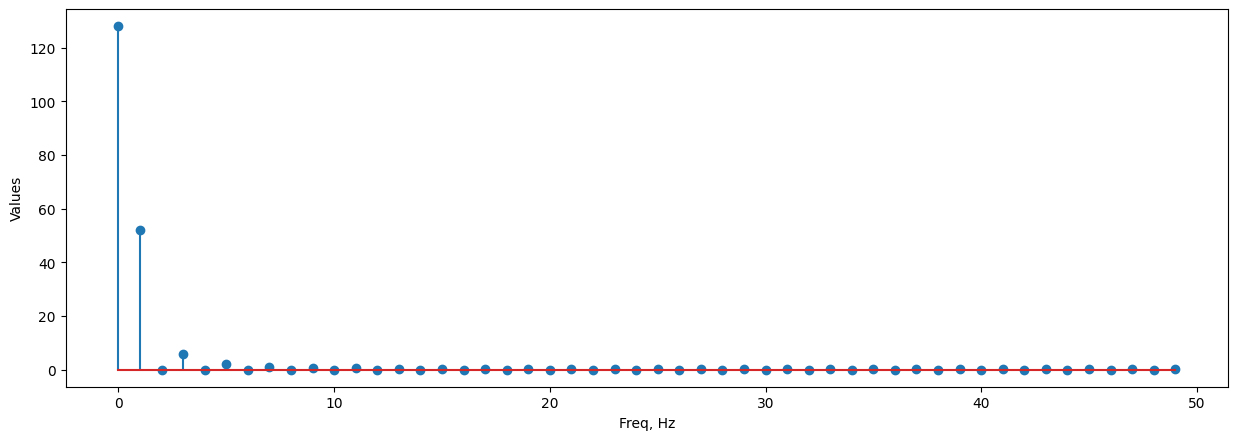

In [29]:
from scipy import signal

s_rate = 256

window_blackman = signal.get_window('blackman', s_rate)
window_bartlett = signal.get_window('bartlett', s_rate)

plt.title("Blackman")
plt.plot(window_blackman)
plt.show()
plot_spectrum_stem(window_blackman, s_rate, 0, 50)

plt.title("Barklet")
plt.plot(window_bartlett)
plt.show()
plot_spectrum_stem(window_bartlett, s_rate, 0, 50)

### Task 2.2

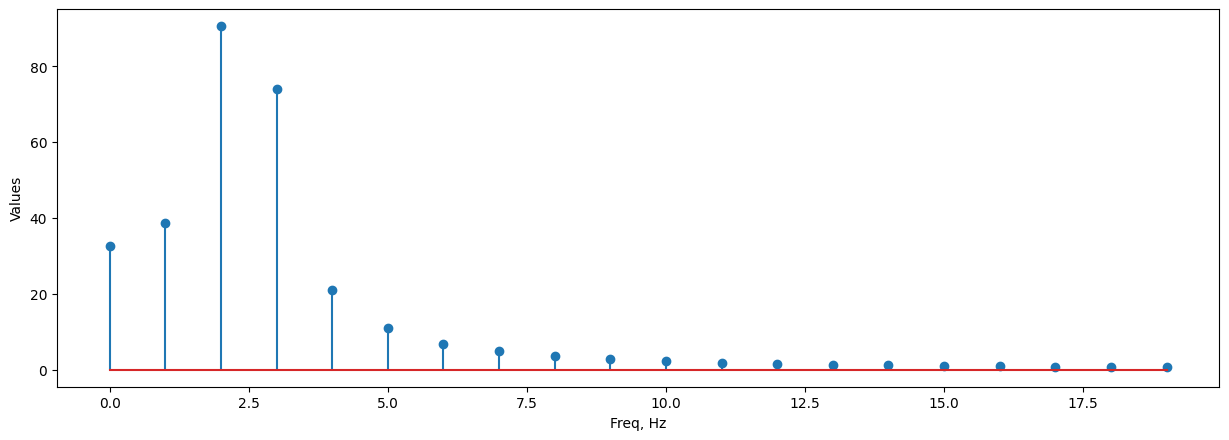

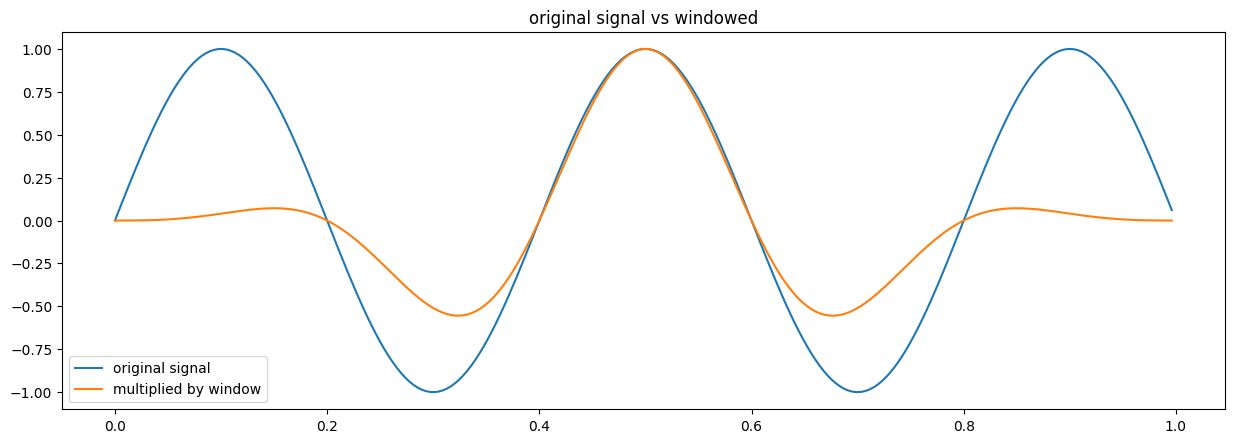

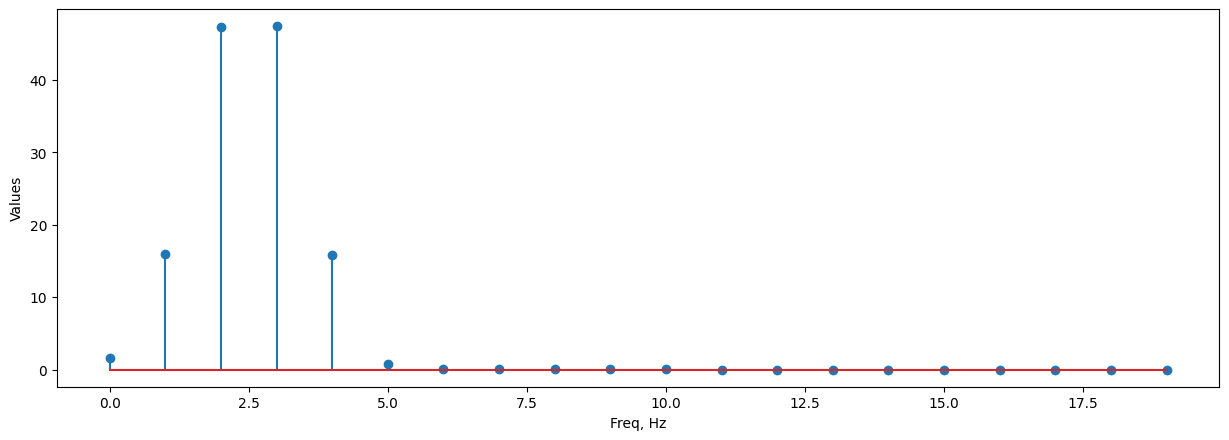

In [30]:
sample_rate = 256
duration = 1
ts, sin_2hz = generate_sine_wave(2, sample_rate, duration)
ts, sin_2_5hz = generate_sine_wave(2.5, sample_rate, duration)
plot_spectrum_stem(sin_2_5hz, sample_rate, 0, 20)

plt.title("original signal vs windowed")
plt.plot(ts, sin_2_5hz, label="original signal")
window_multipy = sin_2_5hz * window_blackman
plt.plot(ts, window_multipy, label="multiplied by window")
plt.legend()
plt.show()

plot_spectrum_stem(window_multipy, sample_rate, 0, 20)


Чомусь тут спектр навпаки не спотворився, а навпаки покращився

### task 2.3

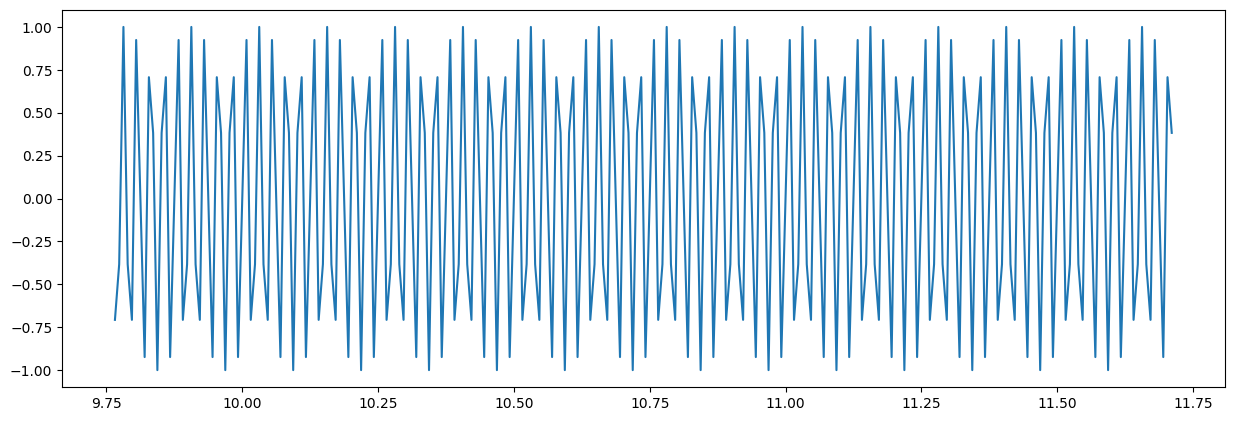

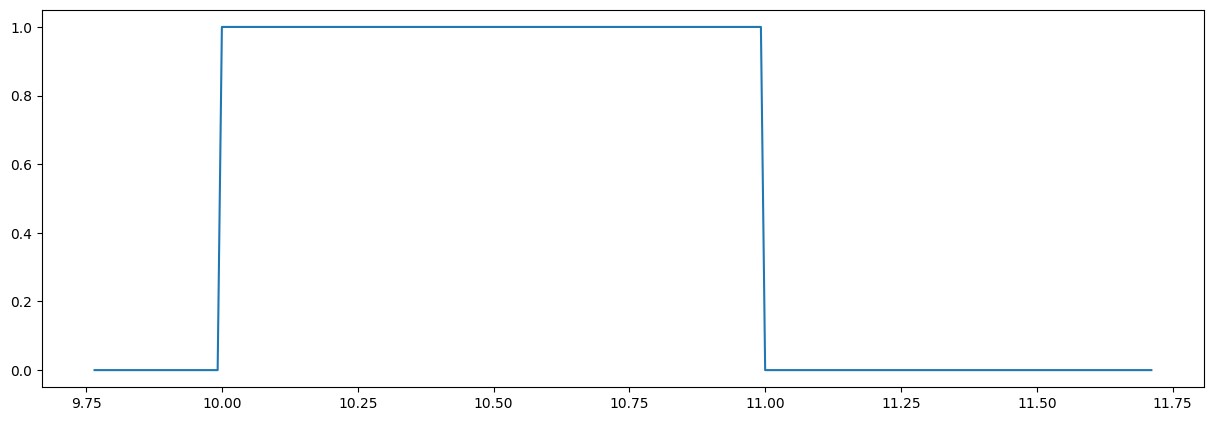

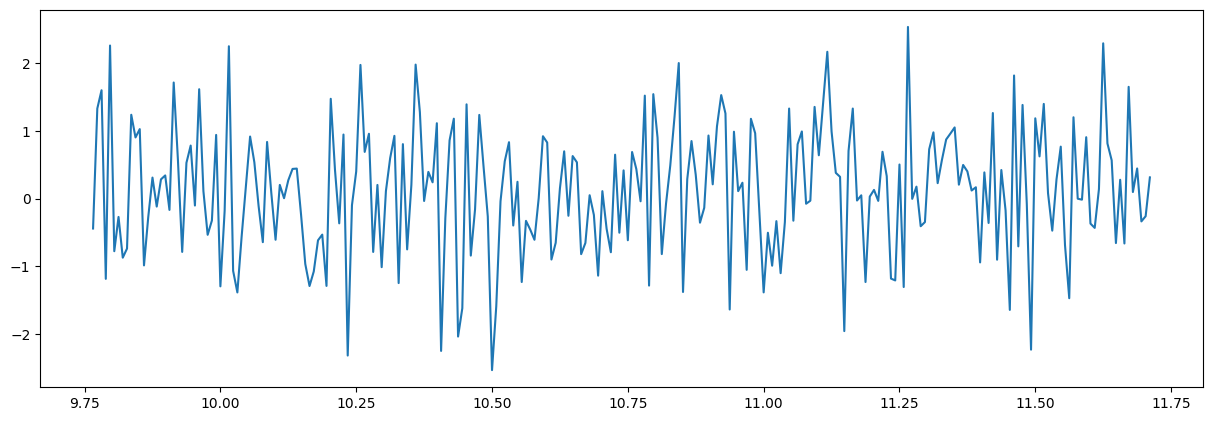

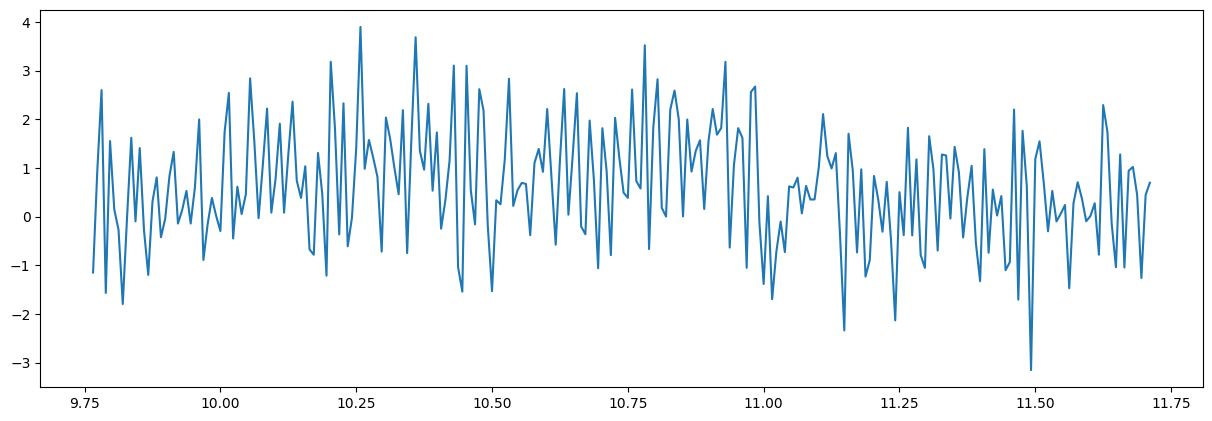

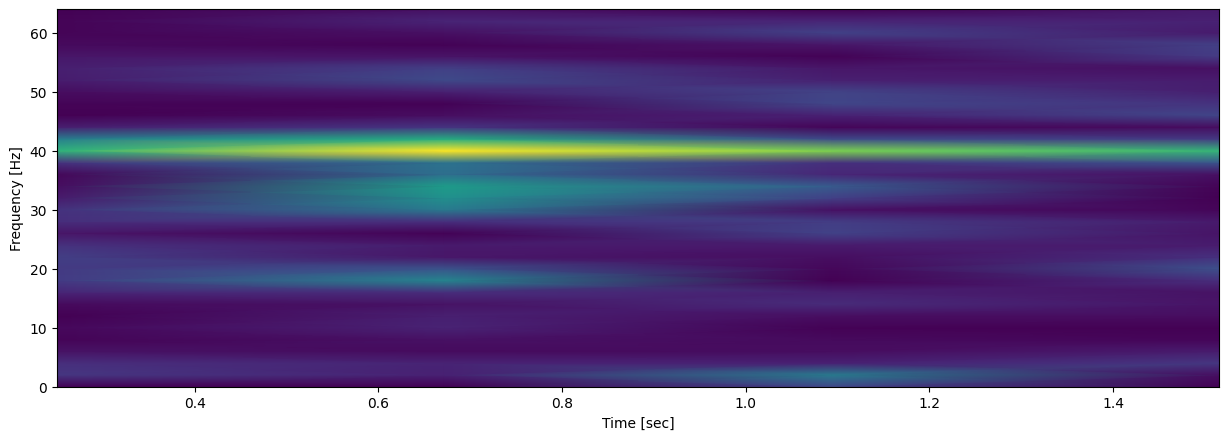

In [31]:
from scipy.signal import spectrogram
sample_rate = 128

ts, sin_40hz = generate_sine_wave(40, sample_rate, 15)

impulse = np.zeros(len(ts))
impulse[10*128: 11*128] = 1

random_sig = np.random.normal(0, 1, impulse.shape)

three_some = sin_40hz + impulse + random_sig
plt.plot(ts[1250:1500], sin_40hz[1250:1500])
plt.show()
plt.plot(ts[1250:1500], impulse[1250:1500])
plt.show()
plt.plot(ts[1250:1500], random_sig[1250:1500])
plt.show()
plt.plot(ts[1250:1500], three_some[1250:1500])
plt.show()
f, t, Sxx = signal.spectrogram(three_some[1250:1500], sample_rate, window='blackman', nperseg=128//2, noverlap=10)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


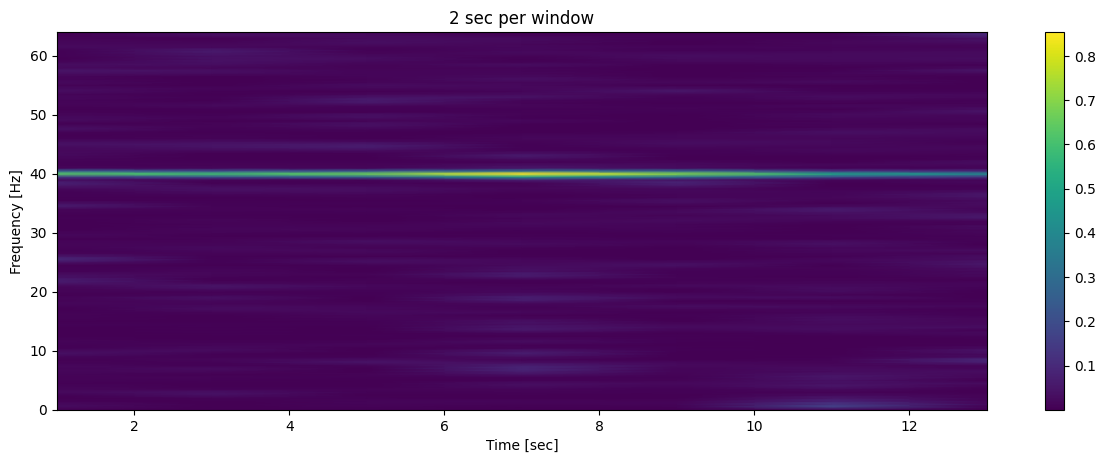

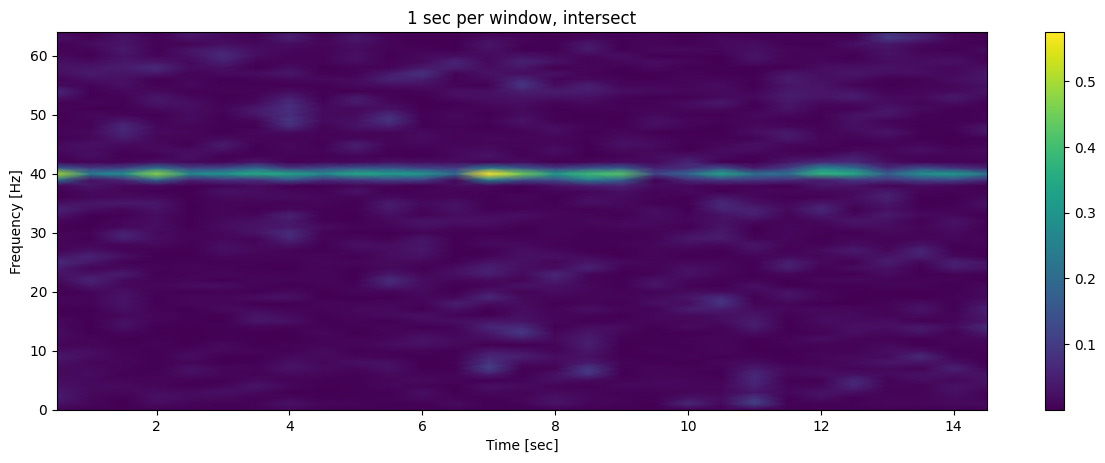

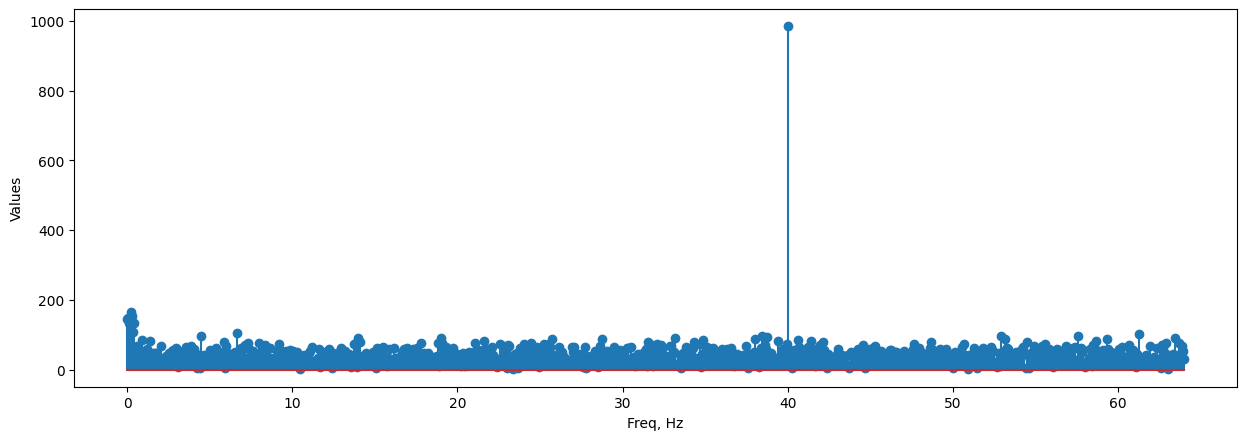

In [32]:
plt.title("2 sec per window")
f, t, Sxx = signal.spectrogram(three_some, sample_rate, window='blackman', nperseg=128 * 2, noverlap=0)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

plt.title("1 sec per window, intersect")
f, t, Sxx = signal.spectrogram(three_some, sample_rate, window='blackman', nperseg=128, noverlap=128//2)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()
plot_spectrum_stem(three_some, sample_rate)

### task 5

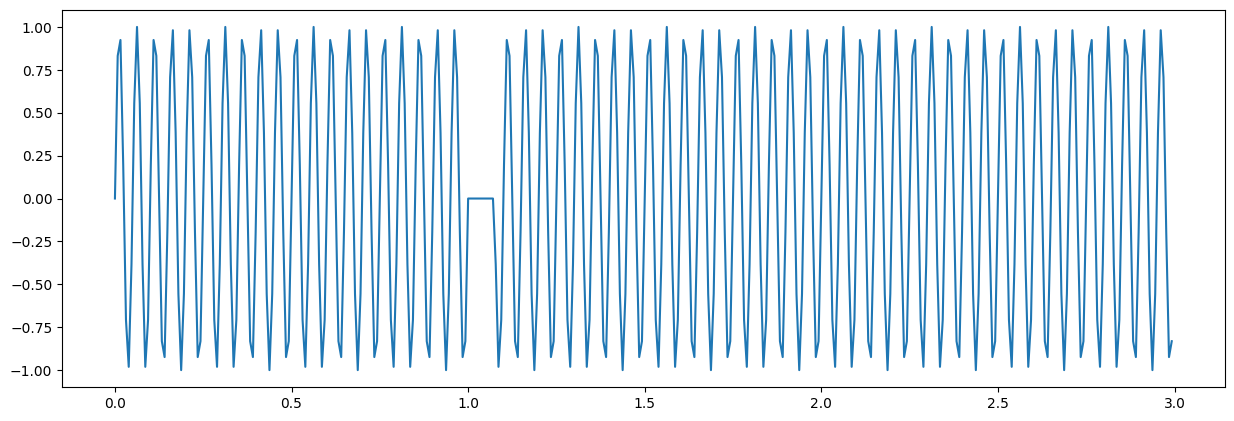

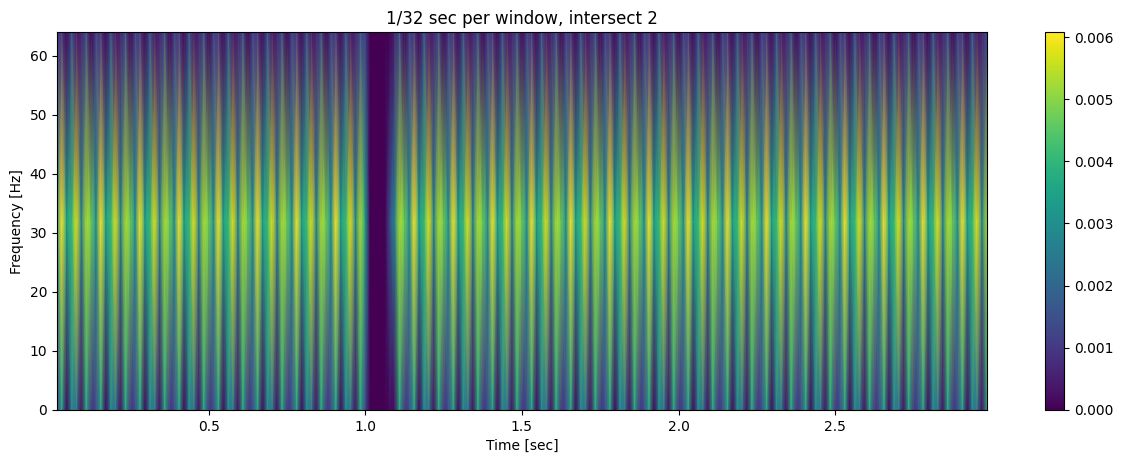

In [33]:
sample_rate = 128

timestamps, sig_20hz = generate_sine_wave(20, sample_rate, 3)
sig_20hz[sample_rate:sample_rate+10] = 0

plt.plot(timestamps, sig_20hz)
plt.show()

plt.title("1/32 sec per window, intersect 2")
f, t, Sxx = signal.spectrogram(sig_20hz, sample_rate, window='blackman', nperseg=128//32, noverlap=128//64)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.show()

### task 6

In [34]:
from scipy.signal import welch

C:\Users\m84200118\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  warnings.warn('nperseg = {0:d} is greater than input length '


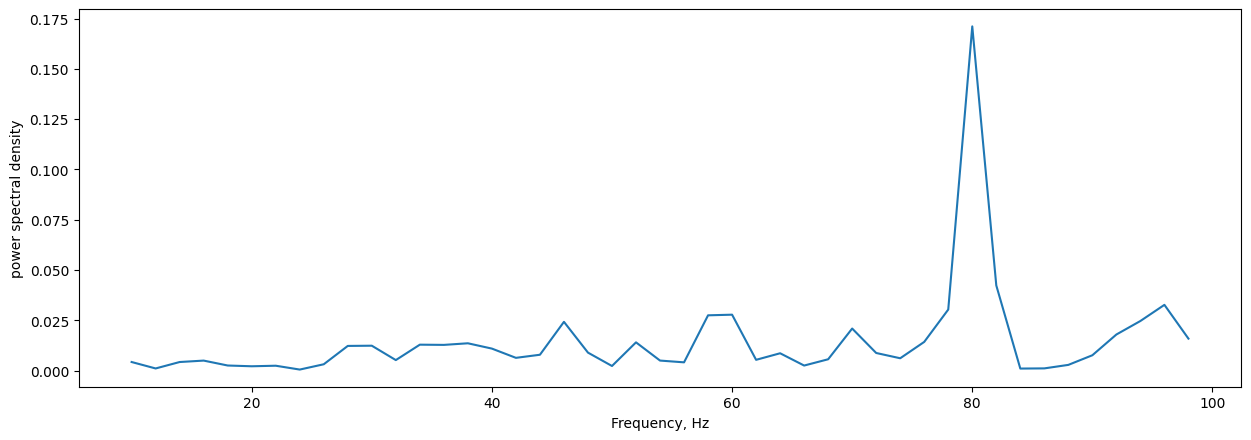

In [35]:

def plot_spectral_power_density(signal, t1, t2, f1, f2, fs):
    if t1 > t2 or t2 * fs > len(signal):
        raise ValueError("incorrect values")
    
    cropped_signal = signal[round(t1 * fs): round(t2 * fs)]
    # Estimate power spectral density
    f, pxx_den = welch(cropped_signal, fs)
    if f1 > f2 or f1 < f[0] or f2 > f[-1]:
        raise ValueError("incorrect frequency values")

    idx1, idx2 = np.where(f == round(f1))[0][0], np.where(f == round(f2))[0][0]
    plt.plot(f[idx1:idx2], pxx_den[idx1:idx2])
    plt.xlabel("Frequency, Hz")
    plt.ylabel("power spectral density")
    plt.show()

plot_spectral_power_density(three_some, 0.5, 1, 10, 100, 256) # note that it is 2x, so 80 hz here
